## Feature Importance in Random Forests

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import RandomForestClassifier

In [2]:
import sklearn
sklearn.__version__

'1.3.0'

## Load the face dataset

In [3]:
data = fetch_olivetti_faces()
X = data.images.reshape((len(data.images), -1))
y = data.target

In [4]:
X.shape

(400, 4096)

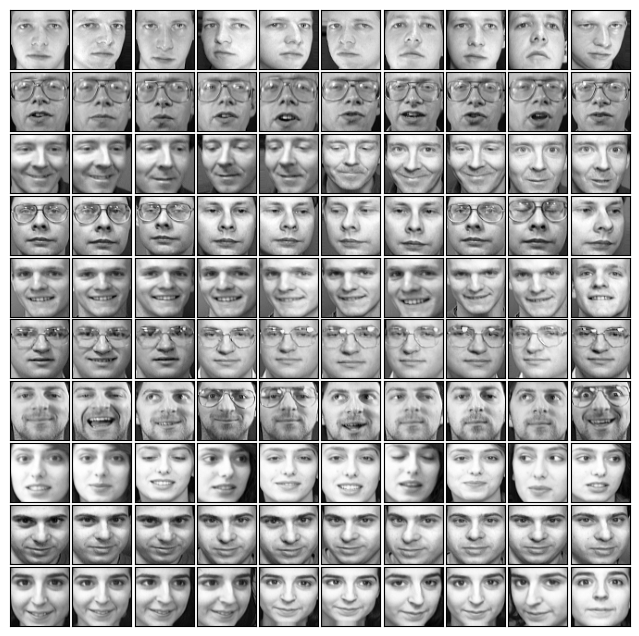

In [5]:
def plot_faces(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i], cmap='gray')
plot_faces(data.images)

## Train a RandomForestClassifier to do facial recognition
use images from 5 people ~ 5 classes

In [6]:
mask = y < 5  # Limit to 5 classes
X = X[mask]
y = y[mask]
forest = RandomForestClassifier(n_estimators=1000,
                              max_features=128,
                              n_jobs=2,
                              random_state=0)

forest.fit(X, y)

RandomForestClassifier(max_features=128, n_estimators=1000, n_jobs=2,
                       random_state=0)

## Show Feature Importance

Text(0.5, 1.0, 'Pixel importances')

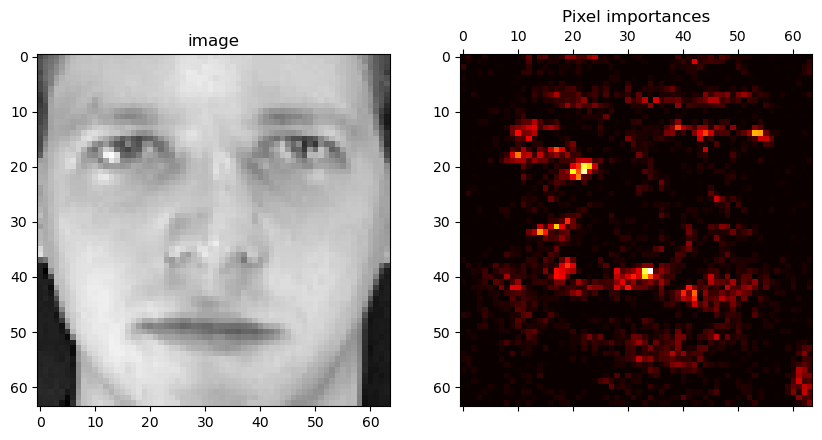

In [7]:
importances = forest.feature_importances_
importances = importances.reshape(data.images[0].shape)

fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(data.images[0],cmap='gray')
ax[0].set_title("image")
ax[1].matshow(importances, cmap=plt.cm.hot)
ax[1].set_title("Pixel importances")

RandomForestClassifier identified important pixels/features for facial recognition